# Zanclean flood Stage 3 : Added background potential energy (BPE) by inflow

## </span>(Both basins rise up to the Atlantic level)</span>



This script is similar to the one used for wMed flood stage 1.
The only difference is the hypsometry.
Here we occupy the whole Mediterranean hypsometry above Sicily sill.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import math

## Upload data files here


In [2]:
SLrise_Stage3 = np.loadtxt(fname="SLrise_Stage3.txt")  # Daily rise of sea-level during stage 3
SLrise_Stage3 = SLrise_Stage3.tolist()
Hypsometry_wMed = np.loadtxt(fname="Hypsometry_wMed_BPEStage3.txt")  # Reconstructed Mediterranean hypsometry 
                #(This file contains wMed hypsometry below the level of Sicily sill, and whole-Mediterranean hypsometry above)

##  Setting parameters

In [3]:
rho_SW = 1027 # Sea-water density [kg m^-3]
g = 9.81      # Acceleration due to gravity [m s^-2]

SLarray =(Hypsometry_wMed[:,0])      # Text file column 1 gives basin depth
Area =(Hypsometry_wMed[:,1])*10**12  # Text file column 2 gives area with depth

### Calculating added BPE (stage 3):

In following sections, added BPE per day during the stage 3 will be calculated.

### 3 modes of sea-level rise considered for stage 1 also applied here.

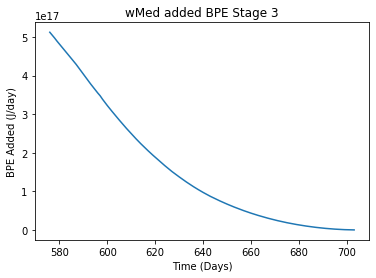

In [4]:

SL1 = SLrise_Stage3[0]  # Present-day sea-level
SL2 = SLrise_Stage3[1]  # Next day sea-level
BPE_sum = []  # Array to store total BPE for plotting

t = 575    # Beginning of stage 3
time=[]

while SL1>0:
    
    t=t+1
    SL1 = SLrise_Stage3[SLrise_Stage3.index(SL1)+1]
    
    if SL1 == SLrise_Stage3[-1]:
        break
        
    SL2 = SLrise_Stage3[SLrise_Stage3.index(SL2)+1]

    # Arrays used for calculations, see below
    y   = []  
    y0  = []
    yi  = []
    p   = []
    y00 = []
    yii = []
    Product_VolumeHt = []
    SL_presentDay    = math.trunc(SL1)
    SL_nextDay       = math.trunc(SL2)+1
    SL2_truncated    = math.trunc(SL2)
    SL_Gap1          = SL1-SL_presentDay
    SL_Gap2          = SL_nextDay-SL2
    
    #print (SL_presentDay,SL_nextDay,SL2_truncated, SL_Gap1, SL_Gap2)
    
    for i,j in zip(SLarray,Area):
        
        if i<SL1 and i>SL2:
            
            y.append(i)
            p.append(j)
            
            for ii,jj in zip(y,p):
                
                product = (SL1-ii+0.5)*jj  
                
            Product_VolumeHt.append(product) 
            
    BPE_completeCells = np.sum(Product_VolumeHt)*g*rho_SW
    

    
    for i0,j0 in zip(SLarray,Area):
        
        if i0 == (SL_presentDay+1):
            
            y0.append(i0)
            y00.append(j0)
         
        #CASE 1
        BPEBot_case1 = np.array(y00)*rho_SW*0.5*g*(SL_Gap1)**2
        # CASE 2 where SL_nextDay = SL_presentDay
        BPEBot_case2 = np.array(y00)*rho_SW*0.5*g*((SL_Gap1)**2)

        
    for ii,ji in zip(SLarray,Area):
        
        if ii == SL_nextDay:
            
            yi.append(ii)
            yii.append(ji)
            
        #Case1    
        BPETop_case1 = np.array(yii)*rho_SW*g*0.5*((2*(SL1-SL2)*(SL2-SL2_truncated))+(SL2-SL2_truncated)**2)
        #Case2 
        BPETop_case2 = np.array(yii)*rho_SW*g*0.5*((2*SL_Gap1*SL_Gap2)+SL_Gap2**2)
        

    if SL_presentDay-SL2_truncated>1:    # CASE 1 (Sealevel rise across several layers)
        BPETotal = BPE_completeCells + BPEBot_case1 - BPETop_case1     
        
    if SL_presentDay-SL2_truncated ==1:  # CASE 2 (Sealevel rise across 2 consecutive layers)
        
        BPETotal = BPEBot_case2 + BPETop_case2
        
    if SL_presentDay==SL2_truncated:     # CASE 3 (Sealevel rise within a layer of 1 m)
        
        BPETotal = ((1-SL_Gap1-SL_Gap2)**2)*rho_SW*g*0.5*np.array(yii) #- Sign doen's matter as squared is positive
        
        
    BPE_sum.append(BPETotal)
    time.append(t)
            
    #print(y00, BPEBot_case1, SL_Gap1, SL_Gap2, SL_presentDay, SL_nextDay, BPETop_case1)
    #print(yii)
    #print(y)
    #print(p)
    #print(prod)
    #print(BPE_completeCells, t)
    #print(BPE_sum)

    
plt.figure()
plt.title('wMed added BPE Stage 3')
plt.ylabel('BPE Added (J/day)')
plt.xlabel('Time (Days)')
plt.plot(time,BPE_sum)

np.savetxt("wMed_added_BPE_Stage3.txt", np.array(BPE_sum), fmt="%s")
    